# Aplicaciones:
* Localización
* Detección de SPAM
* Detección de Autor

# Técnicas
* Filtros de histogramas (Histogram Filters)
* Naive Bayes

# Background teórico necesario
* Probabilidad conjunta, condicional, marginal
* Teorema de Bayes
* Función de masa de probabilidad y distribución de probabilidad
* Independencia

# Herramientas
* Listas y diccionarios en **Python**
* Operaciones con arreglos en **Numpy**
* **Sklearn**: Vectorizers y NB
* Sparse matrices

# Referencias:

- Localización: https://classroom.udacity.com/courses/cs373/lessons/48739381/concepts/487122860923
- Naive Bayes: https://classroom.udacity.com/courses/ud120/lessons/2254358555/concepts/30076485360923
- sklearn Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
- Numpy: https://docs.scipy.org/doc/numpy/index.html

In [196]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Importo las funciones necesarias para dibujar el cuarto del robot
import robot_room as robot
# Vamos a utilizar numpy a lo largo de la presentación
import numpy as np

# Localización

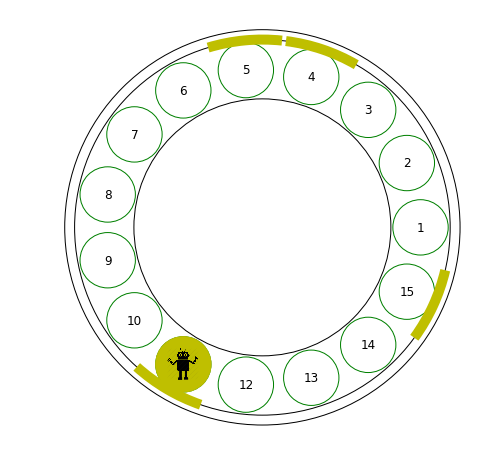

In [198]:
# Defino un arreglo con la posición de las puertas
doors = np.array([4, 5,11,15])
# Cantidad de posiciones posibles para el robot
N = 15
# Defino la posición inicial del robot en forma aleatoria.
initial_loc = np.random.randint(1, N+1)
# Grafico el cuarto del robot
robot.plot_robot_room(loc = initial_loc, N=N, doors = doors, figsize = (8,8))

# ¿Dónde esta el robot?

* El robot no observó su entorno aún
* Estado de máxima confusión

¿Cual es la probabilidad de que el robot se encuentre en la posición 1?

# Variable aleatoria (Definición y notación)
- Mapeo de los posibles resultados del experimento en el eje real.

Definimos $S$ como la variable aleatoria que describe el posición del robot.
- Si el robot esta en la posicion 1 diremos que la variable aleatoria $S$ es 1, es decir, $S = 1$
- En forma general si el robot esta en la posicion $k$ escribiremos $S=k$
- La probabilidad de que el robot este en la posición $k-$esima se escribe: $P(S=k)$

# Representación grafica de una V.A
- Caso disceto: Función de masa de probabilidad
- Caso continuo: Función de densidad de probabilidad

En el caso del robot la función de masa de probabilidad será:

In [5]:
# Defino un total de N unos
N_ones = np.ones(N)
print(N_ones)
# Lo divido por la cantidad de posibles posiciones
P = N_ones/N
print(P)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667]


In [3]:
# Importo el paquete para graficar
from matplotlib import pyplot as plt

def plot_bar_chart(P, indexes=None, index_str='$P(S=%s)$' ,title='Función de masa de probabilidad de la posición del robot: $P(S=k)$'):
    N = len(P)
    if indexes is None:
        indexes = np.linspace(1, N, N, dtype = int) # Desde, Hasta, Cantidad, Tipo
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    string_indexes = [index_str%i for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

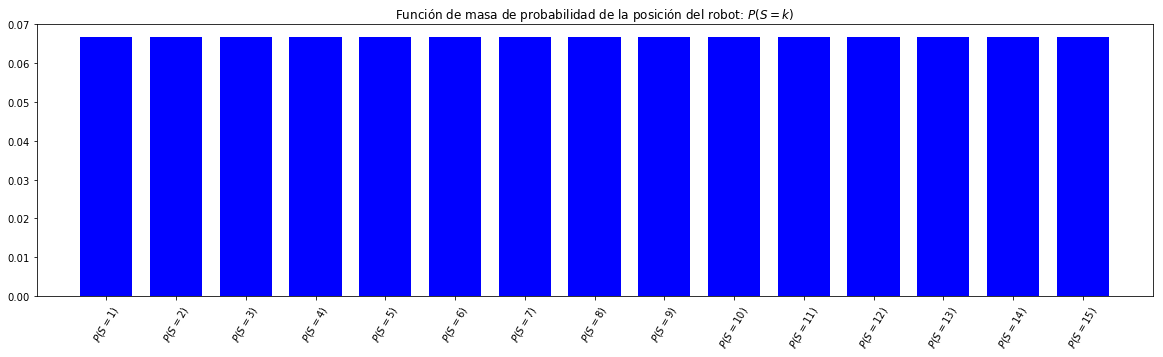

In [7]:
indexes = np.linspace(1, N, N, dtype = int) # Desde, Hasta, Cantidad, Tipo
plot_bar_chart(P, indexes)

Se dice que la V.A $S$ en este caso, tiene una distribución uniforme

Propiedades:

$\sum_{i=1}^N P(S=i) = 1$

In [8]:
# La suma de las probabilidades de cada posición es 1
P.sum()

0.99999999999999989

# Modelo Probabilístico
El modelo que describe la posición inicial del robot es simplemente la V.A $S$ con distribución uniforme.

## Modelo generativo

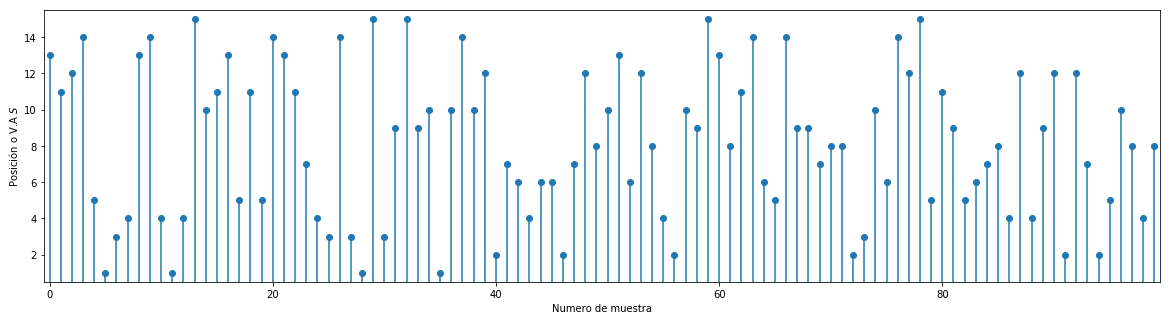

In [9]:
n_samples = 100
initial_locs = np.random.randint(1, N+1, n_samples)
plt.figure(figsize=(20, 5)) # Tamaño del gráfico
plt.stem(initial_locs.T) # ¿Por que lo traspongo?
plt.xlim([-0.5,n_samples-0.5])
plt.ylim([0.5,N+0.5])
plt.xlabel('Numero de muestra')
plt.ylabel('Posición o V.A $S$')
plt.show()

## Histograma

In [10]:
hist_results = np.histogram(initial_locs, bins = N, range=[1,N+1], density=True)
hist_results

(array([ 0.04,  0.06,  0.05,  0.09,  0.07,  0.07,  0.06,  0.08,  0.07,
         0.08,  0.06,  0.08,  0.06,  0.08,  0.05]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.]))

In [11]:
hist_results[0].sum()

0.99999999999999989

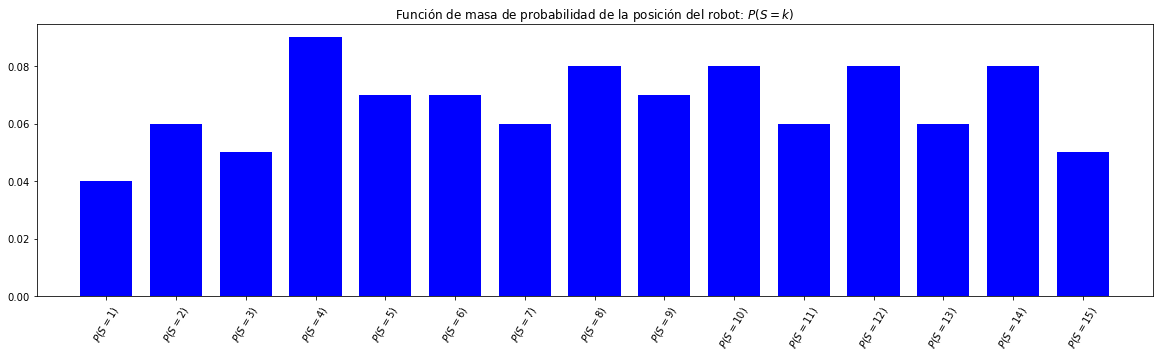

In [12]:
plot_bar_chart(hist_results[0])

¿Por que no se parece demasiado a la función de masa de probabilidad de $X$?

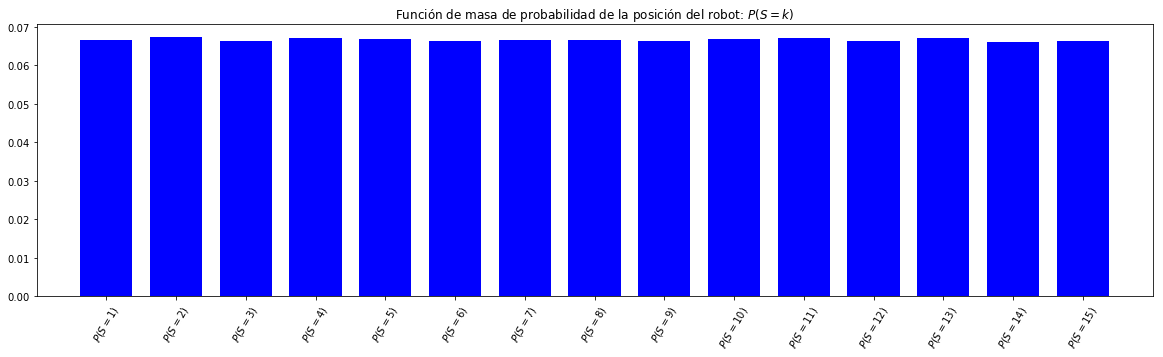

In [13]:
n_samples = 500000
initial_locs_big = np.random.randint(1, N + 1, n_samples)
hist_results_big = np.histogram(initial_locs_big, bins = N, range=[1,N+1], density=True)
plot_bar_chart(hist_results_big[0])

# Probabilidad condicional:
¿Donde esta el robot luego de la primera observación?

**Nota:** A priori el robot conoce la ubicación de las puertas

Dos posibilidades:
- Observa una puerta
- Observa la pared

## Observa una puerta

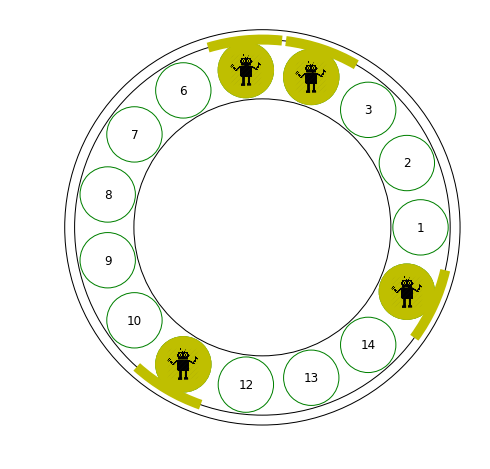

In [14]:
robot.plot_robot_room(loc = doors, N=N, doors = doors, figsize = (8,8))

¿Como se modifica la funcion de masa de probabilidad en este caso?

In [15]:
print('Posiciones puertas:', doors)
P_puerta = np.zeros(N)
print('zeros:',P_puerta)
P_puerta[doors-1] = 1/(len(doors))
print('Probabilidad condicional:',P_puerta)
P_puerta.sum()

Posiciones puertas: [ 4  5 11 15]
zeros: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Probabilidad condicional: [ 0.    0.    0.    0.25  0.25  0.    0.    0.    0.    0.    0.25  0.    0.
  0.    0.25]


1.0

## Notacion
Definimos $X$ como la observación que puede tomar dos posibles valores:
{'puerta','pared'}

Ejemplo:

$P(S=4 \quad|\quad X=puerta) = 1/3$

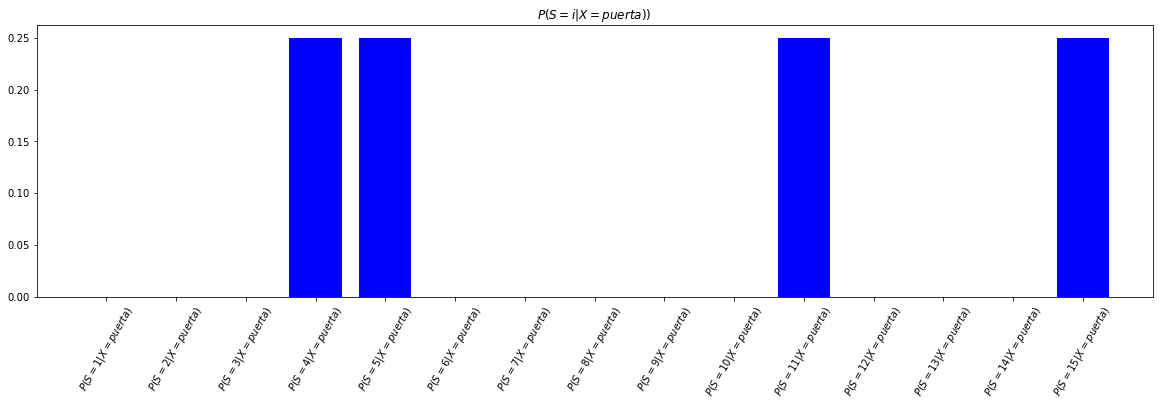

In [16]:
plot_bar_chart(P_puerta, title="$P(S=i|X=puerta))$",index_str='$P(S=%s|X=puerta)$')

## Observa la pared

Posiciones puertas: [ 4  5 11 15]
Probabilidad condicional: [ 0.09090909  0.09090909  0.09090909  0.          0.          0.09090909
  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.09090909
  0.09090909  0.09090909  0.        ]


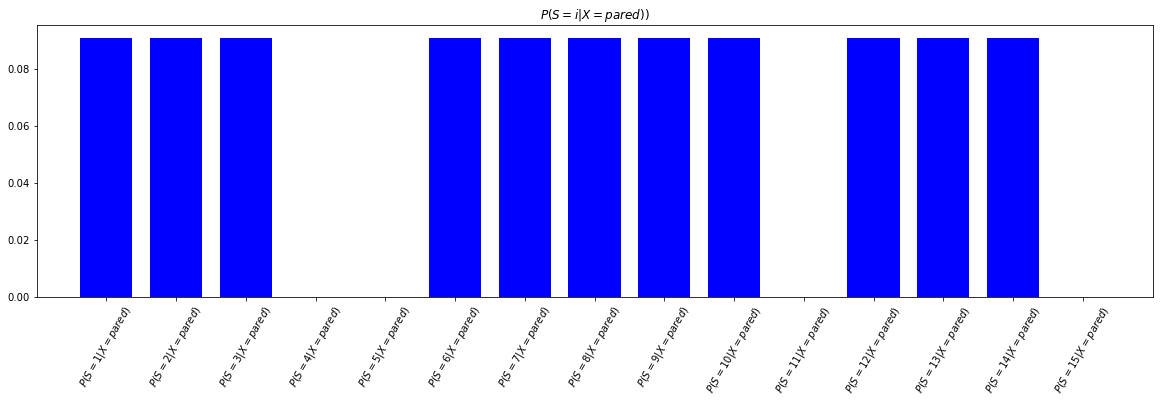

1.0

In [17]:
print('Posiciones puertas:', doors)
P_pared = np.ones(N)/(N-len(doors))
P_pared[doors-1] = 0
print('Probabilidad condicional:',P_pared)
plot_bar_chart(P_pared, title="$P(S=i|X=pared))$",index_str='$P(S=%s|X=pared)$')
P_pared.sum()

En forma general entonces:

$P(S=k|X)$

En este caso S es la posición y X es una puerta o la pared

Por ejemplo: $P(S=4|puerta) = 1/6$

## Likelihood
¿Podemos invertir la condición?

¿Cual es la $P(puerta|S=4)$?

En forma general:

$P(X|S=k)$

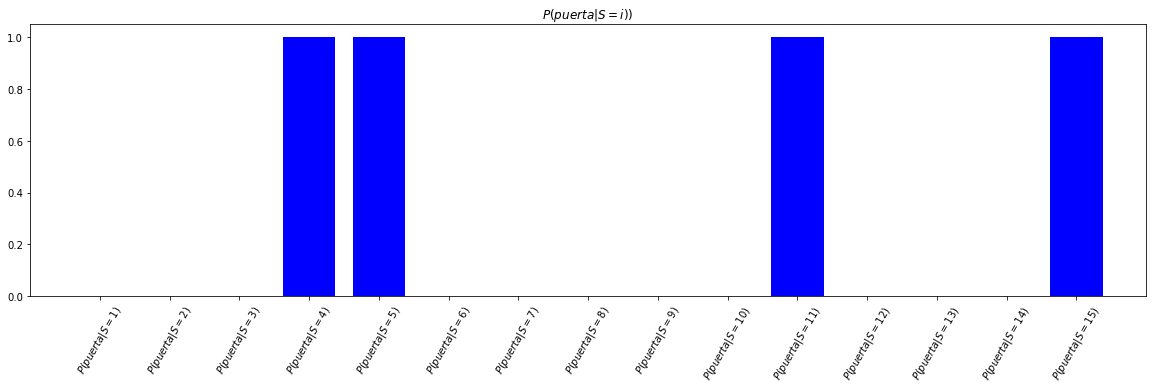

La suma en k es: 4.0


In [18]:
likelihood_puerta = np.zeros(N)
likelihood_puerta[doors-1] = 1
plot_bar_chart(likelihood_puerta, title="$P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')
print('La suma en k es:',likelihood_puerta.sum())

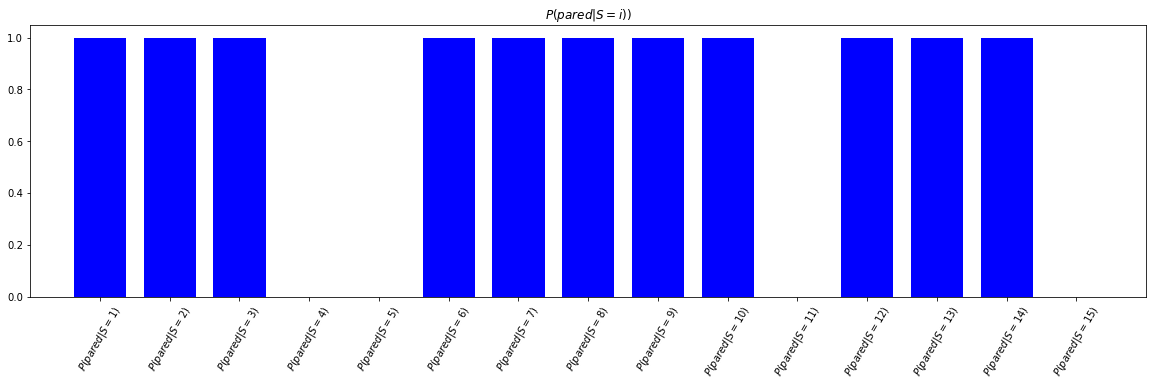

La suma en k es: 11.0


In [19]:
likelihood_pared = np.ones(N)
likelihood_pared[doors-1] = 0
plot_bar_chart(likelihood_pared, title="$P(pared|S=i))$",index_str='$P(pared|S=%s)$')
print('La suma en k es:',likelihood_pared.sum())

# El robot da un paso luego de observar una puerta
¿Como queda si función de masa de probabilidad?

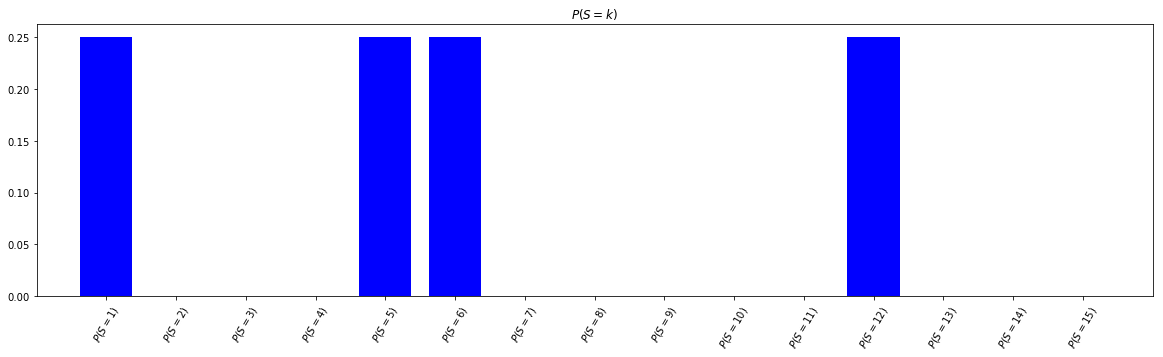

In [20]:
def take_step(P):
    P_updated = np.zeros(len(P))
    P_updated[1:] = P[:-1]
    P_updated[0] = P[-1]
    return P_updated
P_puerta_updated = take_step(P_puerta)
plot_bar_chart(P_puerta_updated, title="$P(S=k)$",index_str='$P(S=%s)$')

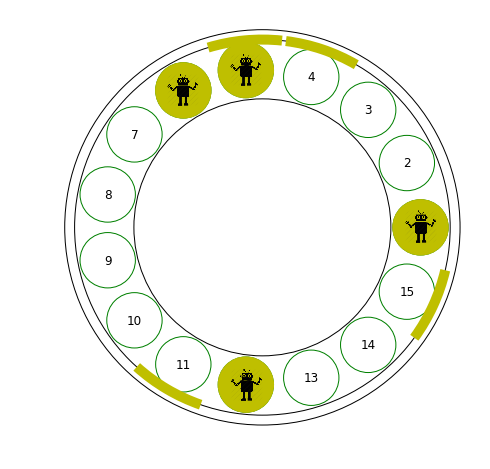

In [21]:
robot.plot_robot_room(loc = doors+1, N=N, doors = doors, figsize = (8,8))

Tenemos entonces:

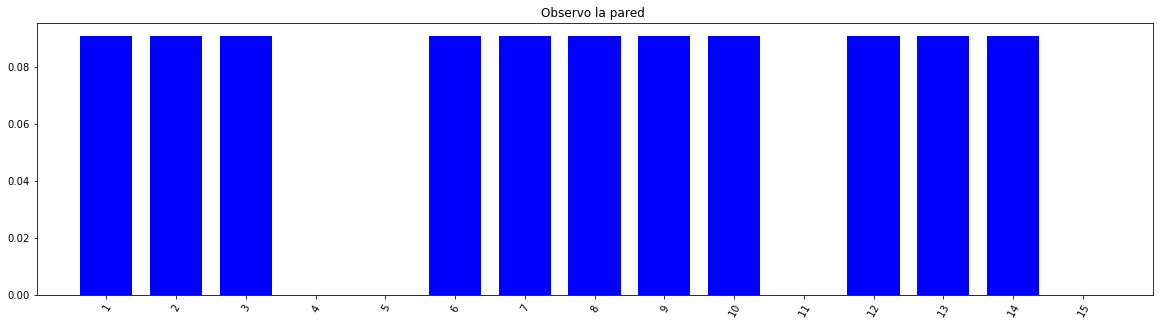

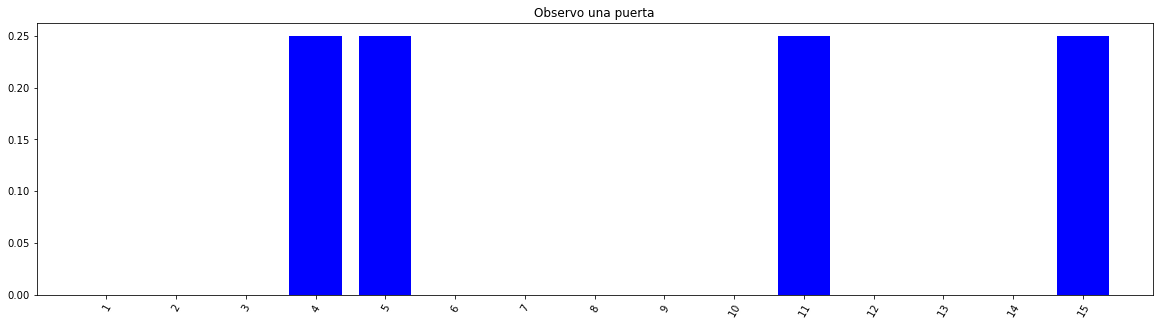

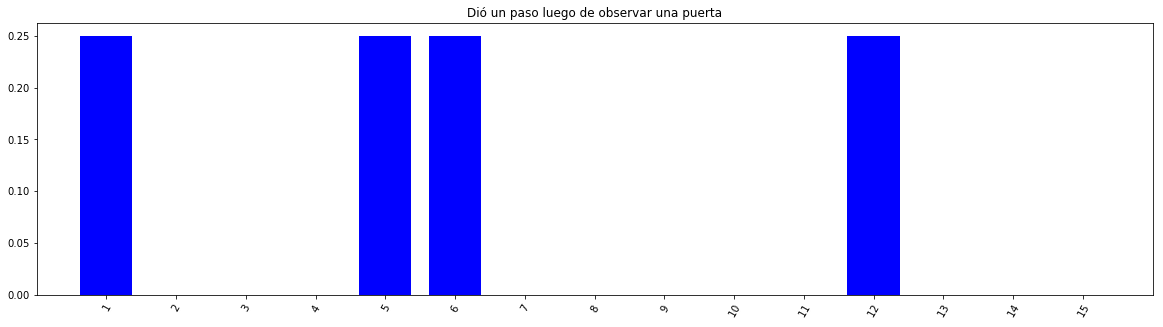

In [22]:
plot_bar_chart(P_pared, title="Observo la pared ",index_str='$%s$')
plot_bar_chart(P_puerta, title="Observo una puerta",index_str='$%s$')
plot_bar_chart(P_puerta_updated, title="Dió un paso luego de observar una puerta",index_str='$%s$')

Si ahora vuelve a observar una puerta. ¿Comó queda la función de masa de probabilidad?

¿Y si observa la pared?

¿Se puede resumir en una operación entre las funciones de masa de probabilidad?

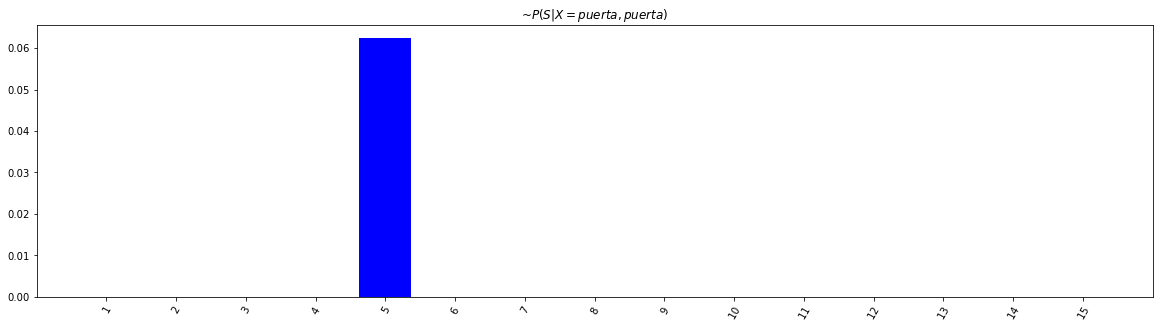

In [23]:
P_puerta_puerta_un = P_puerta*P_puerta_updated
plot_bar_chart(P_puerta_puerta_un, title="~$P(S|X={puerta,puerta})$", index_str='$%s$')

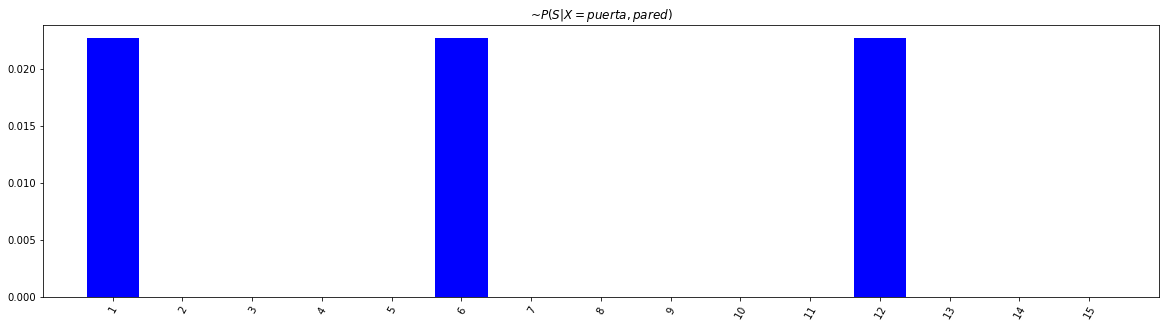

In [24]:
P_puerta_pared_un = P_pared*P_puerta_updated
plot_bar_chart(P_puerta_pared_un, title="~$P(S|X={puerta,pared})$", index_str='$%s$')

¿Qué problemas tienen las "funciones de masa de probabilidad" anteriores?

In [25]:
P_puerta_pared_un.sum()

0.068181818181818177

**Normailización**

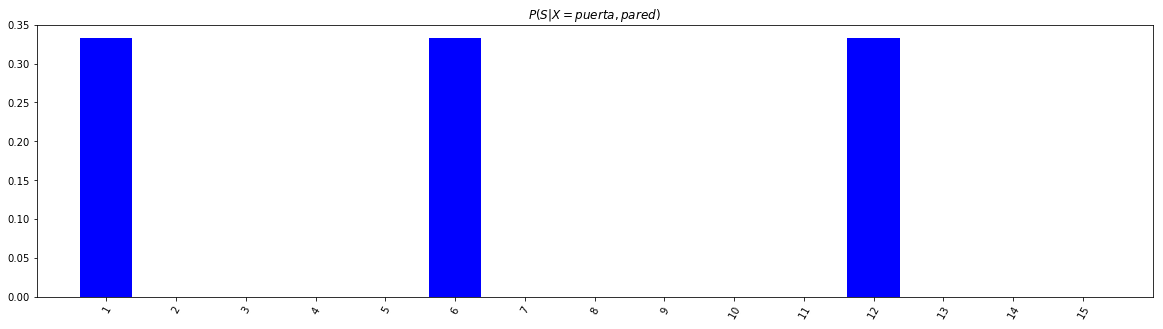

1.0

In [26]:
P_puerta_pared = P_puerta_pared_un/P_puerta_pared_un.sum()
plot_bar_chart(P_puerta_pared, title="$P(S|X={puerta,pared})$", index_str='$%s$')
P_puerta_pared.sum()

# Probabilidad conjunta, likelihood y probabilidad condicional

$P(X,S=k) = P(X|S=k)P(S=K) = P(S=k|X)P(X)$

$P(puerta,S=4) = P(puerta|S=4)P(S=4) = P(S=4|puerta)P(puerta)$

$P(puerta,S=4) = 1 \frac{1}{15} = \frac{1}{4} \frac{4}{15} = \frac{1}{15}$

$P(pared,S=4) = 0 \frac{1}{15} = 0 \frac{11}{15} = 0 $

$P(S=k|X) = \frac{P(X|S=k)P(S=K)}{P(X)}$

$P(S=4|puerta) = \frac{P(puerta|S=4)P(S=4)}{P(puerta)} = \frac{1 \frac{1}{15}}{\frac{4}{15}} = \frac{1}{4}$

# Teorema de Bayes

$ \large P(S=k|X) = \huge \frac{P(X|S=k)P(S=K)}{\sum_i{P(X|S_i)P(S_i)}}$

$\large Posteriori = \huge \frac{Likelihood \quad x \quad Priori}{Normalización}$

En nuestro ejemplo puerta, puerta:

P_puerta_puerta_un = P_puerta*P_puerta_updated
P_puerta_pared = P_puerta_puerta_un/P_puerta_puerta_un.sum()

Likelihood = P_puerta (En realidad no es exactamente el likelihood, pero es proporcional en este caso)
Priori = P_puerta_updated

# Definimos el likelihood en este ejemplo

In [28]:
likelihood = {}
likelihood['puerta'] = likelihood_puerta
likelihood['pared'] = likelihood_pared

# Función de Update

In [32]:
def update_hist(likelihood, prior):
    posterior_un = likelihood*prior
    posterior = posterior_un/posterior_un.sum()
    return posterior

def get_robot_samples(initial_pos, doors, N_positions, N_samples):
    initial_pos = initial_pos - 1
    output = []
    for i in range(N_samples):
        actual_pos = (i+initial_pos)%N_positions + 1
        if actual_pos in doors:
            output.append('puerta')
        else:
            output.append('pared')
    return output

robot_sample = get_robot_samples(10, doors, N, 7)
print(robot_sample)

['pared', 'puerta', 'pared', 'pared', 'pared', 'puerta', 'pared']


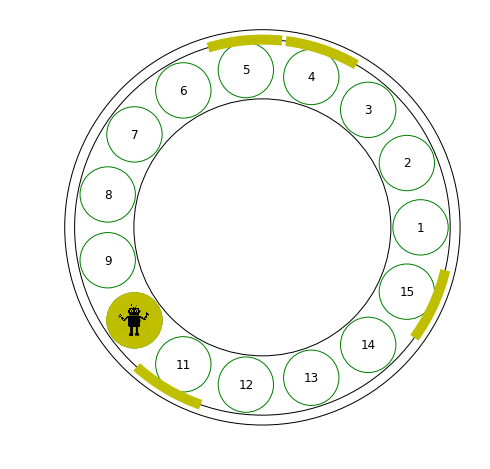

In [30]:
robot.plot_robot_room(loc = 10, N=N, doors = doors, figsize = (8,8))

In [205]:
from helpers.helper import plot_and_get_robot_position_histogram

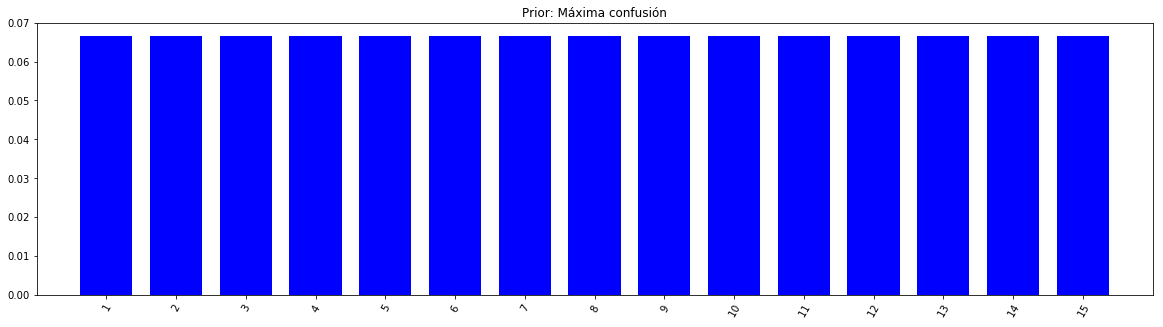

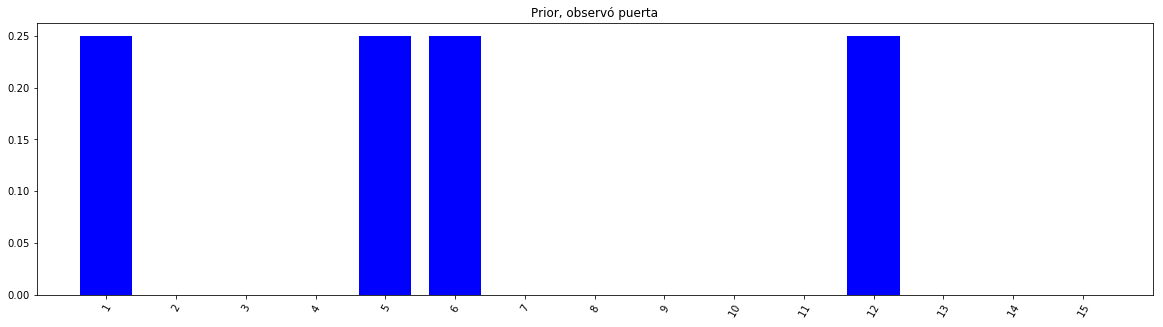

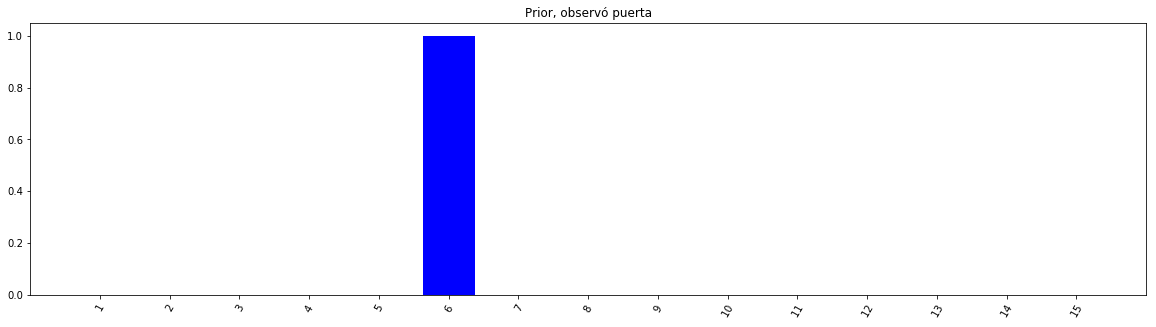

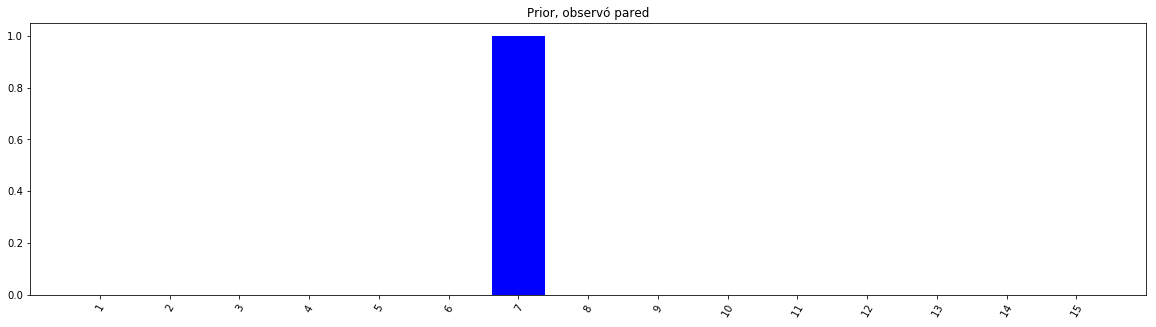

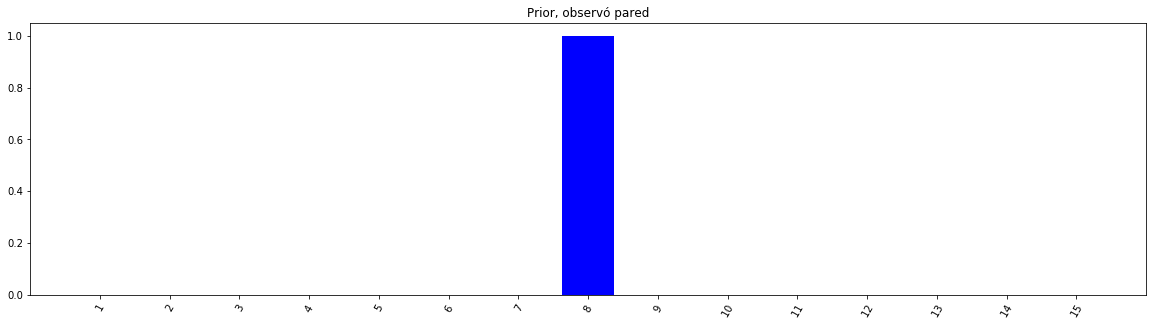

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [223]:
N_positions = 15
N_samples = 4
initial_position = 4
robot_samples = get_robot_samples(initial_position, doors, N_positions, N_samples)
plot_and_get_robot_position_histogram(robot_samples, likelihood)

¿Que pasa si el robot tiene un error al observar?

# Naive bayes
http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

$P(y|x_1,x_2,...,x_n) = \large \frac{P(y)P(x_1, x_2,...,x_n|y)}{P(x_1,x_2,...,x_n)} = \frac{P(y, x_1, x_2,...,x_n)}{P(x_1,x_2,...,x_n)}$

$P(x_1,x_2, x_3, y) = P(x_1 | x_2, x_3,y)P(x_2,x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3| y)P(y)$

$P(comprar,oferta,ganaste,SPAM) = P(comprar | oferta, ganaste,SPAM)P(oferta|ganaste, SPAM)P(ganaste| SPAM)P(SPAM)$

Asumiendo independencia

$P(x_i/y) = P(x_i|y,x_1,...)$

$P(comprar,oferta,ganaste,SPAM) = P(comprar | SPAM)P(oferta|SPAM)P(ganaste| SPAM)P(SPAM)$

$P(y|x_1,x_2,...,x_n) = \large \frac{P(y)\prod P(x_i/y)} {P(x_1,x_2,...,x_n)} = \alpha {P(y)\prod P(x_i/y)}$

$\hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

## Detección de SPAM
V. Metsis, I. Androutsopoulos and G. Paliouras (2006). Spam filtering with Naive Bayes – Which Naive Bayes? 3rd Conf. on Email and Anti-Spam (CEAS).
http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1EEA3C5EE5DDF8409BCC0F09BFB7D98B?doi=10.1.1.61.5542&rep=rep1&type=pdf

Tenemos un dataset donde ya esta preprocesado el texto
- Lemmatization
- Stop words

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [191]:
import os
from collections import Counter
def make_Dictionary(train_dir):
    emails_array = []
    labels = []
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            if 'spmsg' in mail.split('/')[-1]:
                labels.append(True)
            else:
                labels.append(False)
            email_str = ''
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
                    email_str = email_str + ' ' + line
            emails_array.append(email_str)
    dictionary = Counter(all_words)
    # Paste code for non-word removal here(code snippet is given below) 
    return dictionary, emails_array, labels

def remove_uncommon_words(dictionary):
    dict_copy = { k : v for k,v in dictionary.items()}
    list_to_remove = dictionary.keys()

    for item in list_to_remove:
        if item.isalpha() == False: 
            del dict_copy[item]
        elif len(item) == 1:
            del dict_copy[item]
    return Counter(dict_copy)

In [192]:
def read_emails_and_get_dict(folder, max_features=3000):
    dictionary, emails_array, labels = make_Dictionary(folder)
    dictionary = remove_uncommon_words(dictionary)
    dictionary = dictionary.most_common(max_features)
    vocabulary = [key[0] for key in dictionary]
    return vocabulary, emails_array, np.array(labels)

In [387]:
max_features = 100

In [388]:
vocabulary, emails_array, labels = read_emails_and_get_dict('./ling-spam/train-mails', max_features)
count_vectorizer = CountVectorizer(vocabulary=vocabulary)
feature_matrix = count_vectorizer.fit_transform(emails_array)

In [389]:
def get_histogram_from_matrix(alpha, feature_matrix):
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    words_distribution = words_distribution_un/(words_distribution_un.sum()+alpha*feature_matrix.shape[1])
    return words_distribution

spam_feature_matrix = feature_matrix[labels,:]
ham_feature_matrix = feature_matrix[np.logical_not(labels),:]

print('SPAM:',labels.nonzero()[0].shape[0],
      'HAM:',np.logical_not(labels).nonzero()[0].shape[0],
      'total:',len(labels))

print()
print('Palabras diferentes')
print('SPAM:', spam_feature_matrix.nonzero()[0].shape[0],
      'HAM:',ham_feature_matrix.nonzero()[0].shape[0])

print()
print('Cantidad de palabras')
print('SPAM:',spam_feature_matrix.sum(), 'HAM:',ham_feature_matrix.sum())



spam_words_distribution = get_histogram_from_matrix(1, spam_feature_matrix)
ham_words_distribution = get_histogram_from_matrix(1, ham_feature_matrix)

SPAM: 351 HAM: 351 total: 702

Palabras diferentes
SPAM: 10522 HAM: 5217

Cantidad de palabras
SPAM: 35939 HAM: 10594


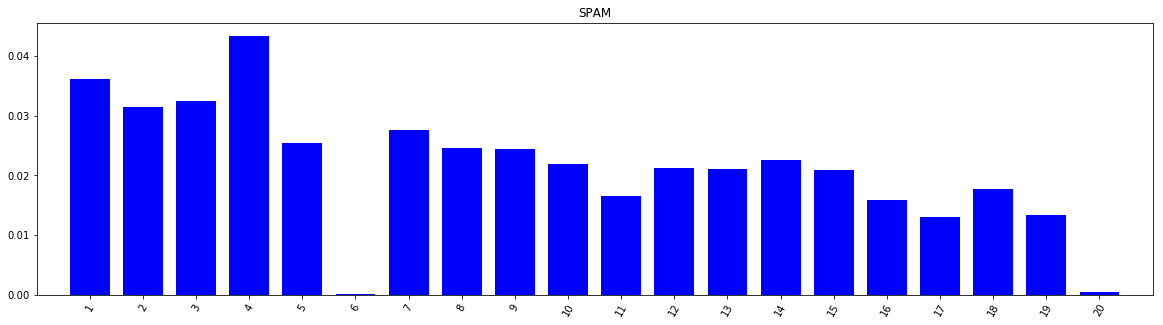

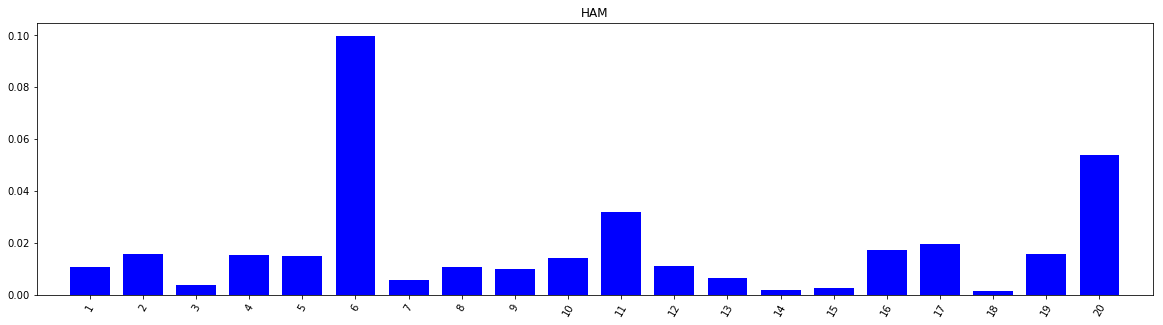

In [390]:
N = 20
plot_bar_chart(np.array(spam_words_distribution)[0][:N], title='SPAM', index_str='%s')
plot_bar_chart(np.array(ham_words_distribution)[0][:N], title='HAM', index_str='%s')

$\hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

$y = [SPAM, HAM]$

In [391]:
row = feature_matrix[0,:]
print(row)
non_zero_row = row.nonzero()
print(non_zero_row)
print(spam_words_distribution[0, non_zero_row].prod())
print(ham_words_distribution[0, non_zero_row].prod())
print(np.log(spam_words_distribution[0, non_zero_row]).sum())
print(np.log(ham_words_distribution[0, non_zero_row]).sum())

  (0, 5)	1
  (0, 9)	1
  (0, 11)	4
  (0, 22)	1
  (0, 37)	1
  (0, 42)	1
  (0, 47)	1
  (0, 51)	1
  (0, 58)	1
(array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([ 5,  9, 11, 22, 37, 42, 47, 51, 58], dtype=int32))
6.95092379868e-34
1.41712029854e-34
-76.3490185904
-77.9392663081


In [378]:
def get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution):
    P_SPAM = labels.nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    P_HAM = np.logical_not(labels).nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    correct_count = 0
    smooth = 0.0000000000001
    for i, row in enumerate(feature_matrix):
        coded_email = row.nonzero()
        spam_log_likelihood = np.log(spam_words_distribution[coded_email]).sum() + np.log(P_SPAM)
        ham_log_likelihood = np.log(ham_words_distribution[coded_email]).sum() + np.log(P_HAM)
        SPAM = spam_log_likelihood>ham_log_likelihood
        if SPAM == labels[i]:
            correct_count = correct_count + 1
    print('%0.3f'%(correct_count/len(labels)))

In [379]:
get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution)

0.991


## Test set

In [380]:
_, emails_array, labels_test = read_emails_and_get_dict('./ling-spam/test-mails', max_features)
count_vectorizer_test = CountVectorizer(vocabulary=vocabulary)
feature_matrix_test = count_vectorizer.fit_transform(emails_array)

In [381]:
get_accuracy(feature_matrix_test, labels_test, spam_words_distribution, ham_words_distribution)

0.969


# sklearn

In [382]:
from sklearn.naive_bayes import MultinomialNB

In [383]:
clf = MultinomialNB(alpha=1)

In [384]:
clf.fit(feature_matrix, labels)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [385]:
clf.score(feature_matrix, labels)

0.99287749287749283

In [386]:
clf.score(feature_matrix_test, labels_test)

0.96153846153846156

# Gaussian NB
https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Sex_classification

In [92]:
# Datos originales de wikipedia
data = [
    {"genero":'hombre', 'altura': 6, 'peso': 180,'pie':12}, 
    {"genero":'hombre', 'altura': 5.92, 'peso': 190,'pie':11}, 
    {"genero":'hombre', 'altura': 5.58, 'peso': 170,'pie':12}, 
    {"genero":'hombre', 'altura': 5.92, 'peso': 165,'pie':10}, 
    {"genero":'mujer', 'altura': 5, 'peso': 100,'pie':6}, 
    {"genero":'mujer', 'altura': 5.5, 'peso': 150,'pie':8}, 
    {"genero":'mujer', 'altura': 5.42, 'peso': 130,'pie':7}, 
    {"genero":'mujer', 'altura': 5.75, 'peso': 150,'pie':9}, 
]

In [103]:
data = [{'altura': 183, 'genero': 'hombre', 'peso': 82, 'pie': 12},
         {'altura': 180, 'genero': 'hombre', 'peso': 86, 'pie': 11},
         {'altura': 170,'genero': 'hombre','peso': 77,'pie': 12},
         {'altura': 180, 'genero': 'hombre', 'peso': 75, 'pie': 10},
         {'altura': 152, 'genero': 'mujer', 'peso': 45, 'pie': 6},
         {'altura': 167, 'genero': 'mujer', 'peso': 68, 'pie': 8},
         {'altura': 165, 'genero': 'mujer', 'peso': 59, 'pie': 7},
         {'altura': 175, 'genero': 'mujer', 'peso': 68, 'pie': 9}]

In [104]:
GNB_features_matrix = np.zeros((len(data),3))
GNB_labels = np.empty((len(data)), dtype=object)
print(GNB_features_matrix)
print(GNB_labels)

for i, person in enumerate(data):
    GNB_features_matrix[i, 0] = person['altura']
    GNB_features_matrix[i, 1] = person['peso']
    GNB_features_matrix[i, 2] = person['pie']
    GNB_labels[i] = person['genero']
print(GNB_features_matrix)
print(GNB_labels)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[None None None None None None None None]
[[ 183.   82.   12.]
 [ 180.   86.   11.]
 [ 170.   77.   12.]
 [ 180.   75.   10.]
 [ 152.   45.    6.]
 [ 167.   68.    8.]
 [ 165.   59.    7.]
 [ 175.   68.    9.]]
['hombre' 'hombre' 'hombre' 'hombre' 'mujer' 'mujer' 'mujer' 'mujer']


In [115]:
men_means = GNB_features_matrix[GNB_labels=='hombre',:].mean(axis=0)
women_means = GNB_features_matrix[GNB_labels=='mujer',:].mean(axis=0)
men_vars = GNB_features_matrix[GNB_labels=='hombre',:].var(axis=0, ddof=1)
women_vars = GNB_features_matrix[GNB_labels=='mujer',:].var(axis=0, ddof=1)
print('medias de los hombres:', men_means)
print('varianzas de los hombres:', men_vars)
print('medias de las mujeres:', women_means)
print('varianzas de las mujeres:', women_vars)

medias de los hombres: [ 178.25   80.     11.25]
varianzas de los hombres: [ 32.25        24.66666667   0.91666667]
medias de las mujeres: [ 164.75   60.      7.5 ]
varianzas de las mujeres: [  90.91666667  118.            1.66666667]


In [116]:
#sample = np.array([6,130,8])
sample = np.array([6*30.48,130*0.453592,8])

In [117]:
def gaussian(x, mu, sig):
    return np.exp(-np.power((x - mu)/sig, 2.)/2)/(np.sqrt(2.*np.pi)*sig)

def plot_gaussian(mu=0, sig= 1, points = 200, N = 2, marker=None, label = None, x = None, color = None, 
                  x_label='',y_label='',ax = None, figsize = (20,10), center_label_tick = None):
    if ax is None:
        f, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize = figsize)
    if x is None:
        x = np.linspace(mu-N*sig, mu+N*sig, points)
    y = gaussian(x, mu, sig)
    ax.plot(x,y, marker = marker, label = label, color = color)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    if center_label_tick is not None:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels[int((len(labels)-1)/2)] = center_label_tick
        ax.set_xticklabels(labels)

    return x, y

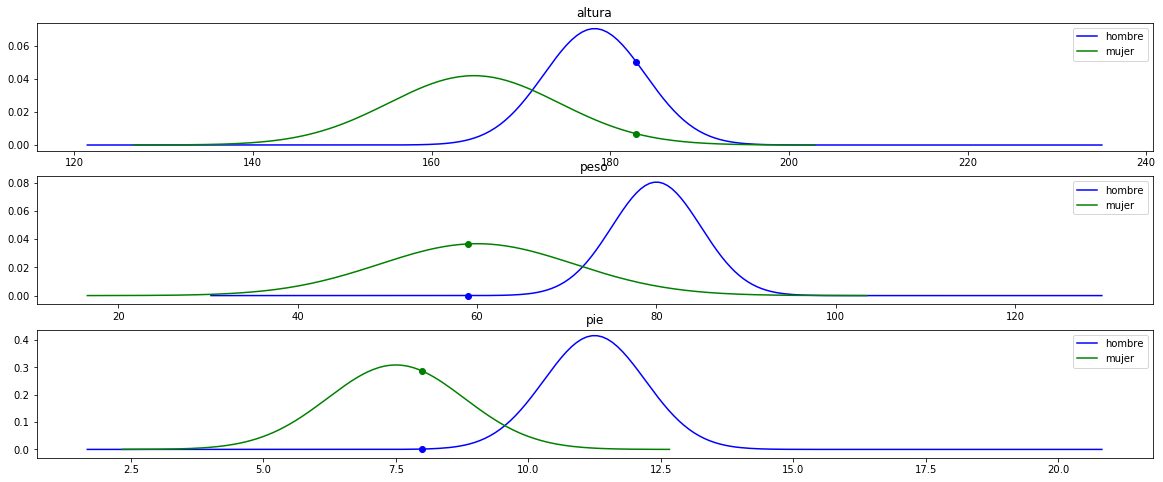

In [118]:
f, axs = plt.subplots(3, 1, sharey=False, sharex=False, figsize = (20,8))
keys = ['altura', 'peso','pie']
for i, ax in enumerate(axs):
    plot_gaussian(men_means[i], np.sqrt(men_vars[i]), ax=ax, N=10, color='b', label='hombre')
    plot_gaussian(women_means[i], np.sqrt(women_vars[i]), ax=ax, N=4, color='g', label='mujer')
    ax.scatter(sample[i], gaussian(sample[i], men_means[i], np.sqrt(men_vars[i])), color='b')
    ax.scatter(sample[i], gaussian(sample[i], women_means[i], np.sqrt(women_vars[i])), color='g')
    ax.title.set_text(keys[i])
    ax.legend()
plt.show()

In [119]:
p_hombre = len(GNB_features_matrix[GNB_labels=='hombre',:])/len(GNB_features_matrix)
p_altura_hombre = gaussian(sample[0], men_means[0], np.sqrt(men_vars[0]))
p_peso_hombre = gaussian(sample[1], men_means[1], np.sqrt(men_vars[1]))
p_pie_hombre = gaussian(sample[2], men_means[2], np.sqrt(men_vars[2]))
posterior_hombre = p_hombre*p_altura_hombre*p_peso_hombre*p_pie_hombre
print(posterior_hombre)

3.38329394047e-10


In [120]:
p_mujer = len(GNB_features_matrix[GNB_labels=='hombre',:])/len(GNB_features_matrix)
p_altura_mujer = gaussian(sample[0], women_means[0], np.sqrt(women_vars[0]))
p_peso_mujer = gaussian(sample[1], women_means[1], np.sqrt(women_vars[1]))
p_pie_mujer = gaussian(sample[2], women_means[2], np.sqrt(women_vars[2]))
posterior_mujer = p_mujer*p_altura_mujer*p_peso_mujer*p_pie_mujer
print(posterior_mujer)

3.59675362977e-05


In [121]:
posterior_mujer>posterior_hombre

True

Notar que no hace falta calcular el denominador

# Utilizando sklearn

In [122]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(GNB_features_matrix, GNB_labels)

In [123]:
y_pred.predict([sample])

array(['mujer'], 
      dtype='<U6')

In [124]:
y_pred.predict_proba([sample])

array([[  1.16498139e-07,   9.99999884e-01]])